In this notebook, we will 
  * Compare distributions using probability mass functions
  * Use kernel density estimation to compare distributions across different categorical groups
  
Again, we will examining [Austin Bikeshare](https://www.kaggle.com/jboysen/austin-bike) data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set()

#### Read in data and do some cleaning

In [4]:
# read in data from a csv file
df = pd.read_csv('../Data/austin_bikeshare_trips.csv')

# Remove any trip with 0 minute duration
df = df[df['duration_minutes'] > 0]

# Reset the integer based index of the DataFrame
df.reset_index(drop=True, inplace=True)

greater_than_2_hours = df[df['duration_minutes'] > 120]
frac_of_dataset = 100 * len(greater_than_2_hours) / len(df)

# Remove any trip lasting longer than 2 hours
df = df[df['duration_minutes'] <= 120]

# Reset the integer based index of the DataFrame
df.reset_index(drop=True, inplace=True)

df.head()

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


Seaborn comes built in with a number of different color palettes. This page contains information about [seaborn color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html) and resources to learn about good techniques for using color in visualizations.

Here, we pick out a color palette and visualize it.

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#66c2a5', '#fc8d62']


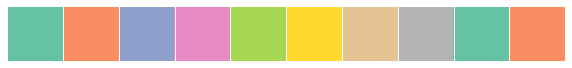

In [5]:
hex_colors = sns.color_palette("Set2", 10).as_hex()
print(hex_colors)

sns.palplot(hex_colors)

#### Last week we examined a histogram of the number of rides by hour over the Austin bikeshare dataset. Here is that plot again for our convenience.

In [6]:
# convert start_time column to datetime type
df['start_time'] = pd.to_datetime(df['start_time'])

# Pull out hour of day into a seperate column
df['start_hour'] = df['start_time'].apply(lambda t: t.hour)

# Count the number of trips that start by hour
hourly_counts = df['start_hour'].value_counts()

# reorder by hour of day
hourly_counts.sort_index(inplace=True)

# Return a DataFrame with the index as an additional column
hourly_counts_df = hourly_counts.reset_index()

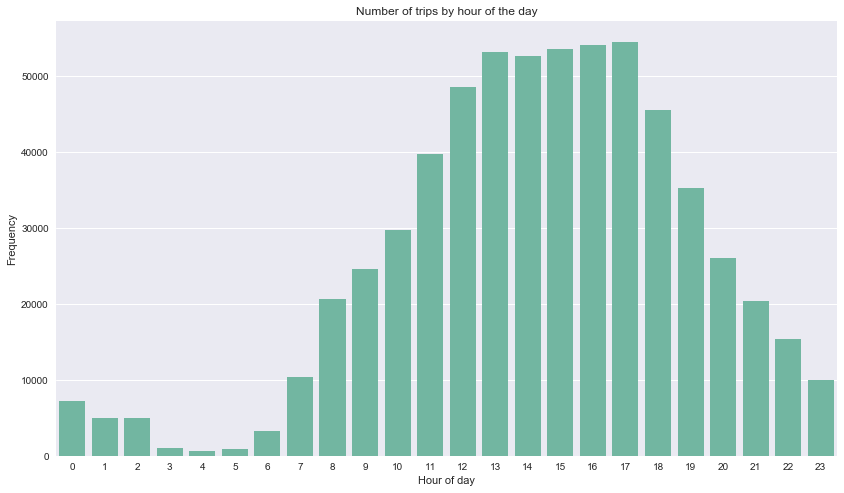

In [7]:
ax = sns.barplot(x='index', y='start_hour', data=hourly_counts_df, color=hex_colors[0])

ax.figure.set_size_inches(14,8)
ax.set_title('Number of trips by hour of the day')
ax.set_xlabel('Hour of day')
ax.set_ylabel('Frequency')

plt.show()

We also noticed that there were different patterns of ridership for weekday rides versus weekend rides. 

Let's examine this difference a bit more closely by using the concept of probability mass functions to compare hourly rides for weekday versus weekend rides.

In [8]:
# Pull out start day of the week into a seperate column where Monday=0, Sunday=6
df['start_day_of_week'] = df['start_time'].apply(lambda t: t.dayofweek)

weekday_rides = df[df['start_day_of_week'] < 5]
weekend_rides = df[df['start_day_of_week'] >= 5]

# Count the number of trips that start by hour
weekday_hourly_counts = weekday_rides['start_hour'].value_counts()
weekend_hourly_counts = weekend_rides['start_hour'].value_counts()

# reorder by hour of day
weekday_hourly_counts.sort_index(inplace=True)
weekend_hourly_counts.sort_index(inplace=True)

# Return a DataFrame with the index as an additional column
weekday_hourly_counts_df = weekday_hourly_counts.reset_index()
weekend_hourly_counts_df = weekend_hourly_counts.reset_index()

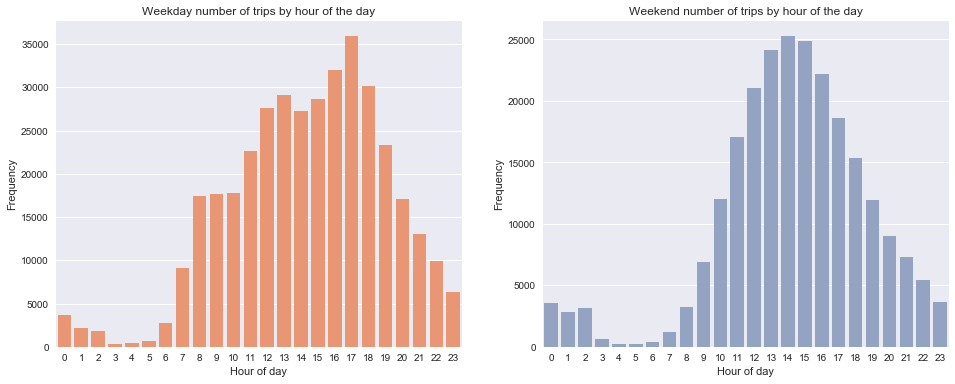

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(x='index', y='start_hour', data=weekday_hourly_counts_df, color=hex_colors[1], ax=ax[0])
sns.barplot(x='index', y='start_hour', data=weekend_hourly_counts_df, color=hex_colors[2], ax=ax[1])

ax[0].set_title('Weekday number of trips by hour of the day')
ax[1].set_title('Weekend number of trips by hour of the day')

for i in range(2):
    ax[i].set_xlabel('Hour of day')
    ax[i].set_ylabel('Frequency')

plt.show()

Let's notice a few things about our histograms. First, our y scales are different. This makes it difficult to accurately compare the hourly trip counts for weekday versus weekend rides. We can improve on this by normalizing by the number of trips in each DataFrame, therbey creating probability mass functions, and plotting these. Also, let's ensure that both plots use the same y axis values.

Let's do that.

In [10]:
weekday_hourly_counts_df['normalized'] = weekday_hourly_counts_df['start_hour'] / weekday_hourly_counts_df['start_hour'].sum()
weekend_hourly_counts_df['normalized'] = weekend_hourly_counts_df['start_hour'] / weekend_hourly_counts_df['start_hour'].sum()


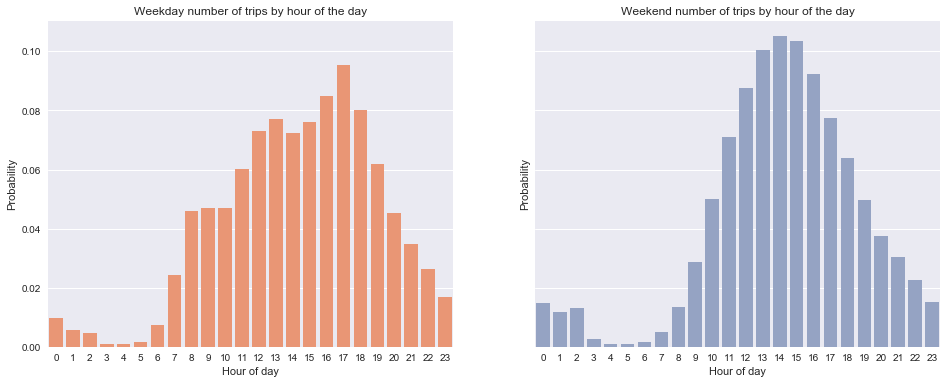

In [11]:
# Note the sharey boolean parameter here to ensure the y axis is shared
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True)

sns.barplot(x='index', y='normalized', data=weekday_hourly_counts_df, color=hex_colors[1], ax=ax[0])
sns.barplot(x='index', y='normalized', data=weekend_hourly_counts_df, color=hex_colors[2], ax=ax[1])

ax[0].set_title('Weekday number of trips by hour of the day')
ax[1].set_title('Weekend number of trips by hour of the day')

for i in range(2):
    ax[i].set_xlabel('Hour of day')
    ax[i].set_ylabel('Probability')

plt.show()

This is better!

Notice the different shapes of the distributions. More trips occur during the early morning hours (midnight-3 am) on weekends than during weekdays, which makes plenty of sense. Also, notice how peaked the weeekend distribution is around 1-3 pm. This peak doesn't exist on weekdays, instead the trips are much more uniformly spread with the most trips occurring at 5 pm, indicating after work commute periods.

We can dig even further into these differences by treating the start time variables as a continuous quantity and using kernel density estimation to estimate a probability density function for each day of the week.

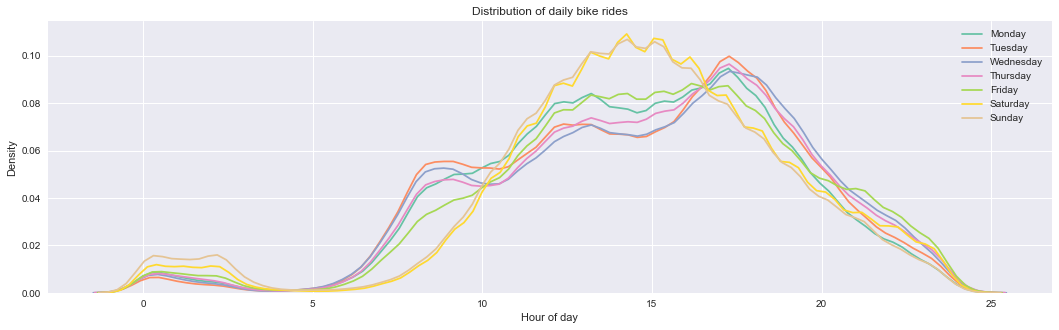

In [12]:
df['hour_fractional'] = df['start_time'].apply(lambda t: t.hour + (t.minute/60.0))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5))

for i in range(7):
    day_i = df[df['start_day_of_week'] == i]
    sns.distplot(day_i['hour_fractional'], hist=False, label=days[i], ax=ax, color=hex_colors[i])
    plt.legend()
    
ax.set_title('Distribution of daily bike rides')
ax.set_xlabel('Hour of day')
ax.set_ylabel('Density')
    
plt.show()

Really interesting. You can almost see the ridership patterns morph throughout the week. 

Notice how Friday seems a bit different from both Monday-Thursday and Saturday-Sunday. You can see the weekend coming in this plot.

This plot is also helpful because you can directly compare the distributions for each day since they are plotted on the same figure.

Let's partition the trip durations into weekday and weekend trips as well and compare these.

In [13]:
# Select the bin intervals
bins = np.arange(0,125,5)

# Return indices of half-open bins to which each value of column belongs.
weekday_duration_min_intervals = pd.cut(weekday_rides['duration_minutes'], bins=bins, include_lowest=True)
weekend_duration_min_intervals = pd.cut(weekend_rides['duration_minutes'], bins=bins, include_lowest=True)

weekday_five_minute_counts = pd.DataFrame(weekday_duration_min_intervals.value_counts(sort=False))
weekday_five_minute_counts = weekday_five_minute_counts.rename(columns={'duration_minutes': 'weekday_duration'})
weekday_five_minute_counts['weekday_duration'] = weekday_five_minute_counts['weekday_duration'] / weekday_five_minute_counts['weekday_duration'].sum()

weekend_five_minute_counts = pd.DataFrame(weekend_duration_min_intervals.value_counts(sort=False))
weekend_five_minute_counts = weekend_five_minute_counts.rename(columns={'duration_minutes': 'weekend_duration'})
weekend_five_minute_counts['weekend_duration'] = weekend_five_minute_counts['weekend_duration'] / weekend_five_minute_counts['weekend_duration'].sum()

duration_df = weekday_five_minute_counts.join(weekend_five_minute_counts)

duration_df = duration_df.reset_index()

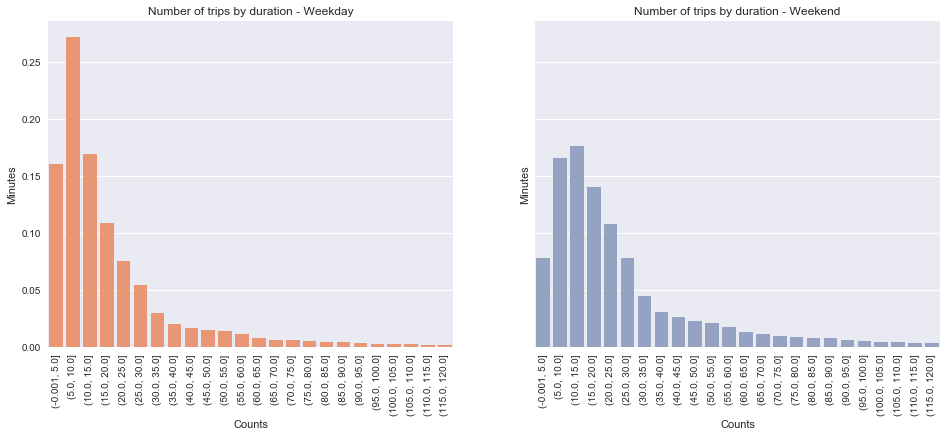

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True)

sns.barplot(x='index', y='weekday_duration', data=duration_df, color=hex_colors[1], ax=ax[0])
sns.barplot(x='index', y='weekend_duration', data=duration_df, color=hex_colors[2], ax=ax[1])

ax[0].set_title('Number of trips by duration - Weekday')
ax[1].set_title('Number of trips by duration - Weekend')

for i in range(2):
    ax[i].set_xlabel('Counts')
    ax[i].set_ylabel('Minutes')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)


plt.show()